In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# we can add the parameter data_home to wherever to where you want to download your data
mnist = fetch_openml('mnist_784')

In [3]:
mnist


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
mnist.target.shape

(70000,)

### orignally I did not standardize the data

In [6]:
#scaler = StandardScaler()

# Fit on training set only.
#mnist.data = scaler.fit_transform(mnist.data)

### Make an instance of PCA

In [7]:
pca = PCA(.95)

## Reduce the dimensionality of the data

In [8]:
lower_dimensional_data = pca.fit_transform(mnist.data)

In [9]:
pca.n_components_

154

The idea with going from 784 components to 154 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (154 components) back to an approximation of the original high dimensional data (784 components).

In [10]:
approximation = pca.inverse_transform(lower_dimensional_data)

Text(0.5, 1.0, '95% of expalined variance ')

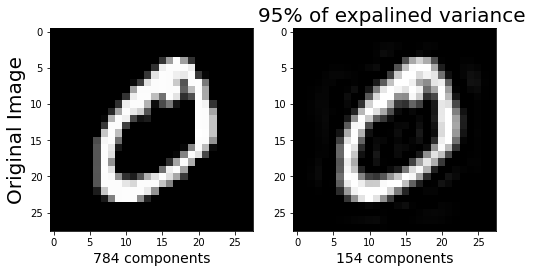

In [11]:
plt.figure(figsize=(8,4))

#original image
plt.subplot(1,2,1)
plt.imshow(mnist.data.iloc[1].to_numpy().reshape(28,28), cmap=plt.cm.gray, interpolation='nearest',clim=(0,255))
plt.xlabel('784 components',fontsize=14)
plt.ylabel('Original Image',fontsize=20)

#154 principal component
plt.subplot(1,2,2)
plt.imshow(approximation[1].reshape(28, 28), cmap= plt.cm.gray, interpolation="nearest", clim=(0,255))
plt.xlabel('154 components', fontsize=14)
plt.title("95% of expalined variance ", fontsize=20)

## Showing Graph of Explained Variance vs Number of principal Components

In [12]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [13]:
pca.fit(mnist.data)

PCA()

In [14]:
pca.n_components_

784

In [16]:
#summing the explained the variance 
too = sum(pca.explained_variance_)

In [17]:
too

3430023.4480795055

In [19]:
var_exp = [(i/too)*100 for i in sorted(pca.explained_variance_, reverse=True)]
print(var_exp[0:5])

[9.74611592249478, 7.155444586878885, 6.149530980722969, 5.4033845285482895, 4.888933703877862]


In [21]:
#cumulative expalined variance
cum_var_exp = np.cumsum(var_exp)

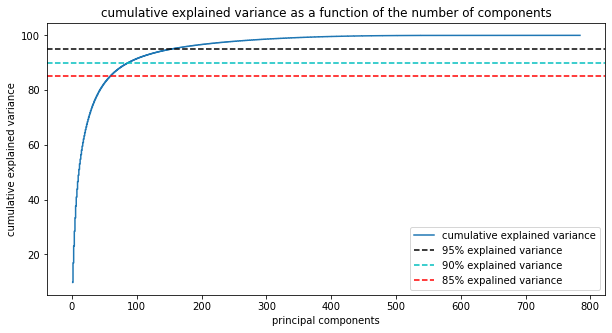

In [28]:
#Plot out the explained variancea superimposed
plt.figure(figsize=(10,5))
plt.step(range(1, 785), cum_var_exp, where='mid', label = "cumulative explained variance")
plt.title('cumulative explained variance as a function of the number of components')
plt.ylabel('cumulative explained variance')
plt.xlabel('principal components')
plt.axhline(y=95, color='k', linestyle="--", label= '95% explained variance')
plt.axhline(y=90, color='c', linestyle="--", label= '90% explained variance')
plt.axhline(y=85, color='r', linestyle="--", label= '85% expalined variance')
plt.legend(loc="best")
plt.show()

### Number of Principal Components for 99%,95%,90% and 85% of explained variance

In [29]:
#Indices corresponding to the first occurrence are returned with the np.argmix function
#Adding 1 to the end of the value in the list as principal components start from 1 and indexs start from 0.

componentsvariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp > 85+1)]

In [30]:
componentsvariance

[784, 331, 154, 87, 62]

In [57]:
from sklearn.decomposition import PCA 

# This is an extremely inefficient function. 
def explainedVariance(percentage, images):
    #percentage should be a decimal from 0 to 1
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

Text(0, 0.5, 'Original Images')

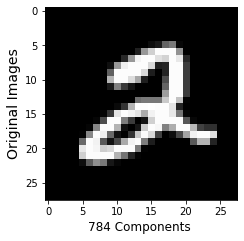

In [58]:


plt.figure(figsize=(20,4))

#original image (784 components)
plt.subplot(1,5,1)
plt.imshow(mnist.data.iloc[5].to_numpy().reshape(28,28), cmap = plt.cm.gray, interpolation='nearest', clim=(0,255))
plt.xlabel('784 Components ', fontsize = 12)
plt.ylabel('Original Images', fontsize=14)

       
           
           

Text(0.5, 1.0, '99% of Explained Variance')

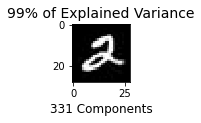

In [59]:
plt.subplot(1, 5, 2)
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14)

Text(0, 0.5, '95% of Explained Variance ')

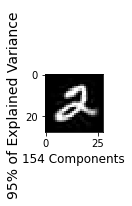

In [70]:
#154 principal components
plt.subplot(1,5,3)
plt.imshow(explainedVariance(.95,mnist.data)[5].reshape(28,28), cmap = plt.cm.gray, interpolation="nearest", clim=(0,255))
plt.xlabel("154 Components", fontsize=12)
plt.ylabel("95% of Explained Variance ", fontsize=14) 


           


Text(0, 0.5, '90% of Explained Variance')

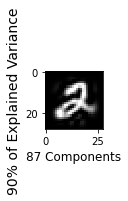

In [71]:
#87 principal components
plt.subplot(1,5,4)
plt.imshow(explainedVariance(.90,mnist.data)[5].reshape(28,28), cmap = plt.cm.gray, interpolation="nearest", clim=(0,255))
plt.xlabel("87 Components", fontsize=12)
plt.ylabel("90% of Explained Variance", fontsize=14)
           

Text(0, 0.5, '85% of explained variance')

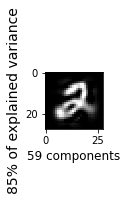

In [72]:
#59 principal components           
plt.subplot(1,5,5)
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28,28), cmap=plt.cm.gray, interpolation="nearest", clim=(0,255));          
plt.xlabel("59 components", fontsize=12)           
plt.ylabel("85% of explained variance", fontsize=14)    

In [73]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']